In [ ]:
'''
    K-Means Clustering -->
    
    K-Means Clustering is an unsupervised machine learning algorithm used for partitioning
    a dataset into a set of distinct, non-overlapping groups, called clusters.
    It minimizes the variance within clusters while maximizing the variance between clusters.
    It's widely used in applications like market segmentation, pattern recognition,
    image compression, and anomaly detection.
'''

In [ ]:
'''
    Steps in K-Means Clustering -->
    
    Initialize Centroids :
    Choose k random points from the dataset as the initial cluster centroids.

    Assign Data Points to Clusters :
    For each data point, compute the distance to each centroid (commonly using Euclidean distance).
    Assign the data point to the nearest centroid.
    
    Update Centroids :
    Compute the mean of all points assigned to a cluster and update the centroid to this mean.

    Repeat :
    Iterate the assignment and update steps until centroids stabilize or a maximum number
    of iterations is reached.
    
    Output :
    Return the k clusters and their centroids.
'''

<img src='Source/Graph/1 Data.png' style="width:400px; height:auto; margin-left:40px;">

<img src='Source/Graph/2 Centroids.png' style="width:400px; height:auto; margin-left:40px;">

<img src='Source/Graph/3 Cluster.png' style="width:400px; height:auto; margin-left:40px;">

<img src='Source/Graph/4 Update.png' style="width:400px; height:auto; margin-left:40px;">

<img src='Source/Graph/5 Optimal.png' style="width:400px; height:auto; margin-left:40px;">

In [ ]:
'''
    Advantages -->

    Simple and easy to implement.
    Efficient for large datasets (complexity O(n⋅k⋅t), where n is the number of data points,
    k is the number of clusters, and t is the number of iterations).
    Works well with spherical, equally-sized clusters.
    
    Disadvantages -->

    Sensitive to the initial placement of centroids.
    Requires pre-specifying k, the number of clusters.
    Not suitable for clusters with varying densities or non-spherical shapes.
    Can get stuck in local optima.
'''

In [ ]:
'''
    Choosing the Optimal k -->
    
    The Elbow Method :
    Calculate the sum of squared distances (inertia) for different values of k.
    Plot k against inertia.
    The "elbow point" (where inertia decreases sharply and then levels off) indicates the optimal k.
'''

<img src='Source/Elbow.png' alt='Elbow Method' style="width:500px; height:auto; margin-left:40px;">

In [ ]:
'''
    K-Means ++
    
    K-Means ++ is an enhancement to the K-Means clustering algorithm.
    It improves the initial selection of cluster centroids, which helps K-Means converge
    faster and often leads to better clustering results.
    
    Problem with K-Means Initialization -->
    
    In standard K-Means, the initial cluster centroids are chosen randomly.
    This can lead to :

    Poor convergence due to bad initialization.
    Suboptimal clustering results when centroids are poorly placed.
    
    Solution -->
    
    K-Means++ Initialization
    K-Means++ ensures better initialization by spreading out the initial centroids,
    reducing the chances of convergence to a poor local minimum.
'''

In [ ]:
'''
    Steps in K-Means ++ -->

    First Centroid : Choose the first centroid randomly from the dataset.
    Subsequent Centroids : For each subsequent centroid :
    Calculate the distance D(x) from each point x in the dataset to the nearest already chosen centroid.
    Select the next centroid probabilistically, where a point x is chosen with a probability proportional
    to D(x)^2.
    Repeat: Repeat until k centroids are chosen.
    Run K-Means: Use these centroids to initialize the standard K-Means algorithm.
'''

<img src='Source/K-Means++.png' alt='K-Means++' style="width:500px; height:auto; margin-left:40px;">

In [ ]:
'''
    Advantages of K-Means ++ -->
    
    Improved Convergence: Reduces the number of iterations needed for K-Means to converge.
    Better Clustering Quality: Produces better clustering results by starting with well-separated centroids.
'''

In [4]:
#   Importing Libraries -->

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
#   Importing Dataset -->

data = pd.read_csv('Data/Mall_Customers.csv')
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
x_data = data.iloc[:, [3,4]].values
x_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

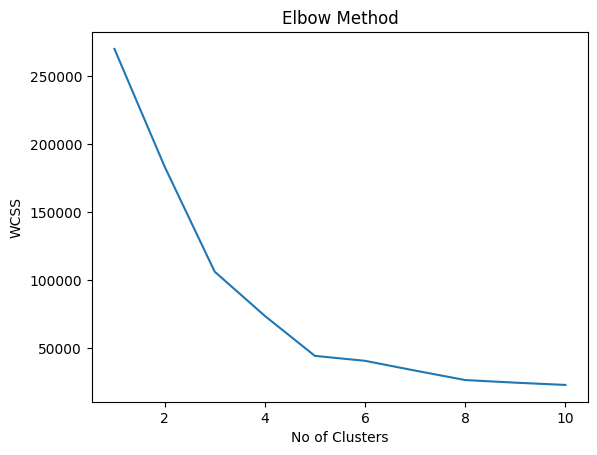

In [9]:
#   Elbow Method To Find Optimal no of Clusters -->

wcss = []

for i in range(1,11) :
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(x_data)
    wcss.append(model.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show() 

In [10]:
#   Building The Model -->

model = KMeans(n_clusters=5, init='k-means++', random_state=42)
model.fit(x_data)

KMeans(n_clusters=5, random_state=42)

In [12]:
#   Predicting Results -->

y_pred = model.predict(x_data)
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

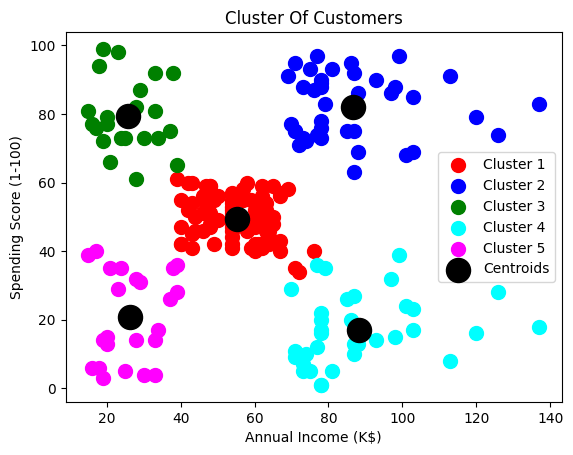

In [15]:
#   Visualizing Results -->

plt.scatter(x_data[y_pred==0,0], x_data[y_pred==0,1], s=100, c='red', label="Cluster 1")
plt.scatter(x_data[y_pred==1,0], x_data[y_pred==1,1], s=100, c='blue', label="Cluster 2")
plt.scatter(x_data[y_pred==2,0], x_data[y_pred==2,1], s=100, c='green', label="Cluster 3")
plt.scatter(x_data[y_pred==3,0], x_data[y_pred==3,1], s=100, c='cyan', label="Cluster 4")
plt.scatter(x_data[y_pred==4,0], x_data[y_pred==4,1], s=100, c='magenta', label="Cluster 5")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=300, c="black", label="Centroids")
plt.title("Cluster Of Customers")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()